In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab.patches import cv2_imshow
from google.colab import drive

In [4]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15376, done.
remote: Total 15376 (delta 0), reused 0 (delta 0), pack-reused 15376
Receiving objects: 100% (15376/15376), 13.98 MiB | 17.99 MiB/s, done.
Resolving deltas: 100% (10341/10341), done.


In [5]:
ls

darknet/  sample_data/


In [6]:
cd darknet

/content/darknet


In [7]:
ls

3rdparty/               darknet_video.py        net_cam_v4.sh*
build/                  data/                   README.md
build.ps1*              image_yolov3.sh*        results/
cfg/                    image_yolov4.sh*        scripts/
cmake/                  include/                src/
CMakeLists.txt          json_mjpeg_streams.sh*  vcpkg.json
DarknetConfig.cmake.in  LICENSE                 video_yolov3.sh*
darknet_images.py       Makefile                video_yolov4.sh*
darknet.py              net_cam_v3.sh*


In [ ]:
!make

# Downloading YOLO Weights

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

# Testing The Object Detector

In [10]:
ls

3rdparty/               darknet.py              net_cam_v4.sh*
backup/                 darknet_video.py        obj/
build/                  data/                   README.md
build.ps1*              image_yolov3.sh*        results/
cfg/                    image_yolov4.sh*        scripts/
cmake/                  include/                src/
CMakeLists.txt          json_mjpeg_streams.sh*  vcpkg.json
darknet*                LICENSE                 video_yolov3.sh*
DarknetConfig.cmake.in  Makefile                video_yolov4.sh*
darknet_images.py       net_cam_v3.sh*          yolov4.weights


In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/person.jpg

In [16]:
def show_detection(path):
    plt.figure(figsize = (15,5))
    image = cv2.imread(path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Shape : {}".format(image.shape))
    plt.axis("off")
    plt.show()

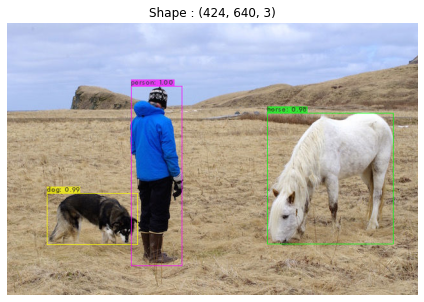

In [17]:
show_detection("/content/darknet/predictions.jpg")

# Darknet And GPU

In [18]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [19]:
ls

3rdparty/               darknet_video.py        predictions.jpg
backup/                 data/                   README.md
build/                  image_yolov3.sh*        results/
build.ps1*              image_yolov4.sh*        scripts/
cfg/                    include/                src/
cmake/                  json_mjpeg_streams.sh*  vcpkg.json
CMakeLists.txt          LICENSE                 video_yolov3.sh*
darknet*                Makefile                video_yolov4.sh*
DarknetConfig.cmake.in  net_cam_v3.sh*          yolov4.weights
darknet_images.py       net_cam_v4.sh*
darknet.py              obj/


In [23]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
!make

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/giraffe.jpg

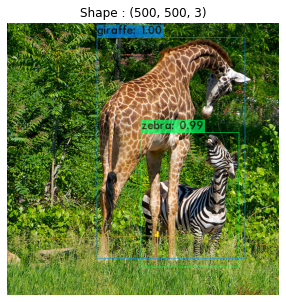

In [26]:
show_detection("predictions.jpg")

# Threshold

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg

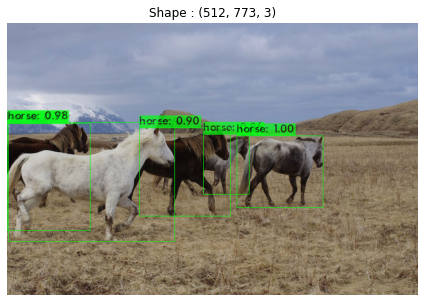

In [32]:
show_detection("predictions.jpg")

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -thresh 0.9

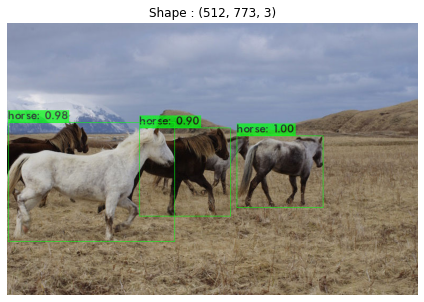

In [34]:
show_detection("predictions.jpg")

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -thresh 0.98

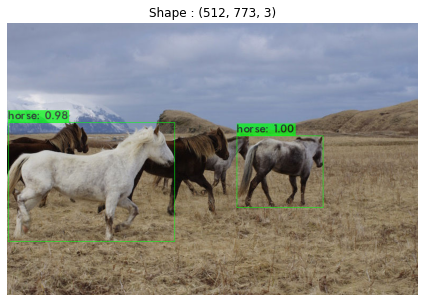

In [36]:
show_detection("predictions.jpg")

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -thresh 0.00001

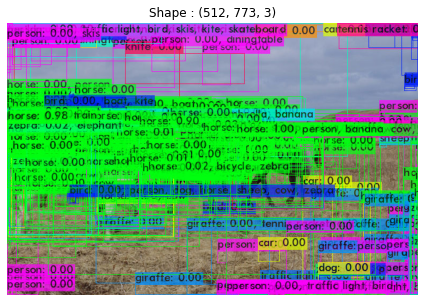

In [38]:
show_detection("predictions.jpg")

In [ ]:
# Bu kısım bize kutu merkezlerinin yerlerini söylüyor !!

!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -ext_output

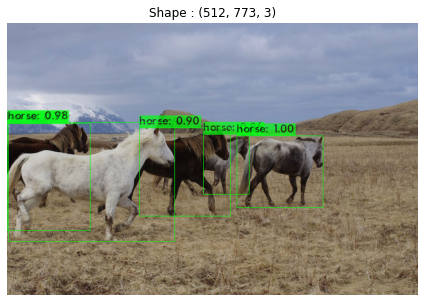

In [40]:
show_detection("predictions.jpg")

# Videos

In [41]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show /content/drive/MyDrive/Cursos\ -\ recursos/Computer\ Vision\ Masterclass/Videos/video_street.mp4 -i 0 -out_filename /content/drive/MyDrive/Cursos\ -\ recursos/Computer\ Vision\ Masterclass/Videos/video_street_result.avi